<a href="https://colab.research.google.com/github/isaiasjunior61/04a-Atividade-1/blob/main/cienciasdedados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
from google.colab import files
uploaded = files.upload()

Saving CCARDBALANCE.xlsx to CCARDBALANCE (1).xlsx


In [6]:
df = pd.read_excel(next(iter(uploaded)))

In [7]:
df = df.drop(columns=['ID'])

In [9]:
print(df.head())
print(df.info())

     Renda  Limite  Rating  Cartoes  Idade  Educacao    Sexo Estudante Casado  \
0   14.891    3606     283        2     34        11    Male        No    Yes   
1  106.025    6645     483        3     82        15  Female       Yes    Yes   
2  104.593    7075     514        4     71        11    Male        No     No   
3  148.924    9504     681        3     36        11  Female        No     No   
4   55.882    4897     357        2     68        16    Male        No    Yes   

       Etnia  Gasto Mensal  
0  Caucasian           333  
1      Asian           903  
2      Asian           580  
3      Asian           964  
4  Caucasian           331  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Renda         400 non-null    float64
 1   Limite        400 non-null    int64  
 2   Rating        400 non-null    int64  
 3   Cartoes       

In [10]:
print(df.describe())

            Renda        Limite      Rating     Cartoes       Idade  \
count  400.000000    400.000000  400.000000  400.000000  400.000000   
mean    45.218885   4735.600000  354.940000    2.957500   55.667500   
std     35.244273   2308.198848  154.724143    1.371275   17.249807   
min     10.354000    855.000000   93.000000    1.000000   23.000000   
25%     21.007250   3088.000000  247.250000    2.000000   41.750000   
50%     33.115500   4622.500000  344.000000    3.000000   56.000000   
75%     57.470750   5872.750000  437.250000    4.000000   70.000000   
max    186.634000  13913.000000  982.000000    9.000000   98.000000   

         Educacao  Gasto Mensal  
count  400.000000    400.000000  
mean    13.450000    520.015000  
std      3.125207    459.758877  
min      5.000000      0.000000  
25%     11.000000     68.750000  
50%     14.000000    459.500000  
75%     16.000000    863.000000  
max     20.000000   1999.000000  


In [12]:
print(df['Sexo'].value_counts())
print(df['Estudante'].value_counts())
print(df['Casado'].value_counts())
print(df['Etnia'].value_counts)

Sexo
Female    207
 Male     193
Name: count, dtype: int64
Estudante
No     360
Yes     40
Name: count, dtype: int64
Casado
Yes    245
No     155
Name: count, dtype: int64
<bound method IndexOpsMixin.value_counts of 0             Caucasian
1                 Asian
2                 Asian
3                 Asian
4             Caucasian
             ...       
395           Caucasian
396    African American
397           Caucasian
398           Caucasian
399               Asian
Name: Etnia, Length: 400, dtype: object>


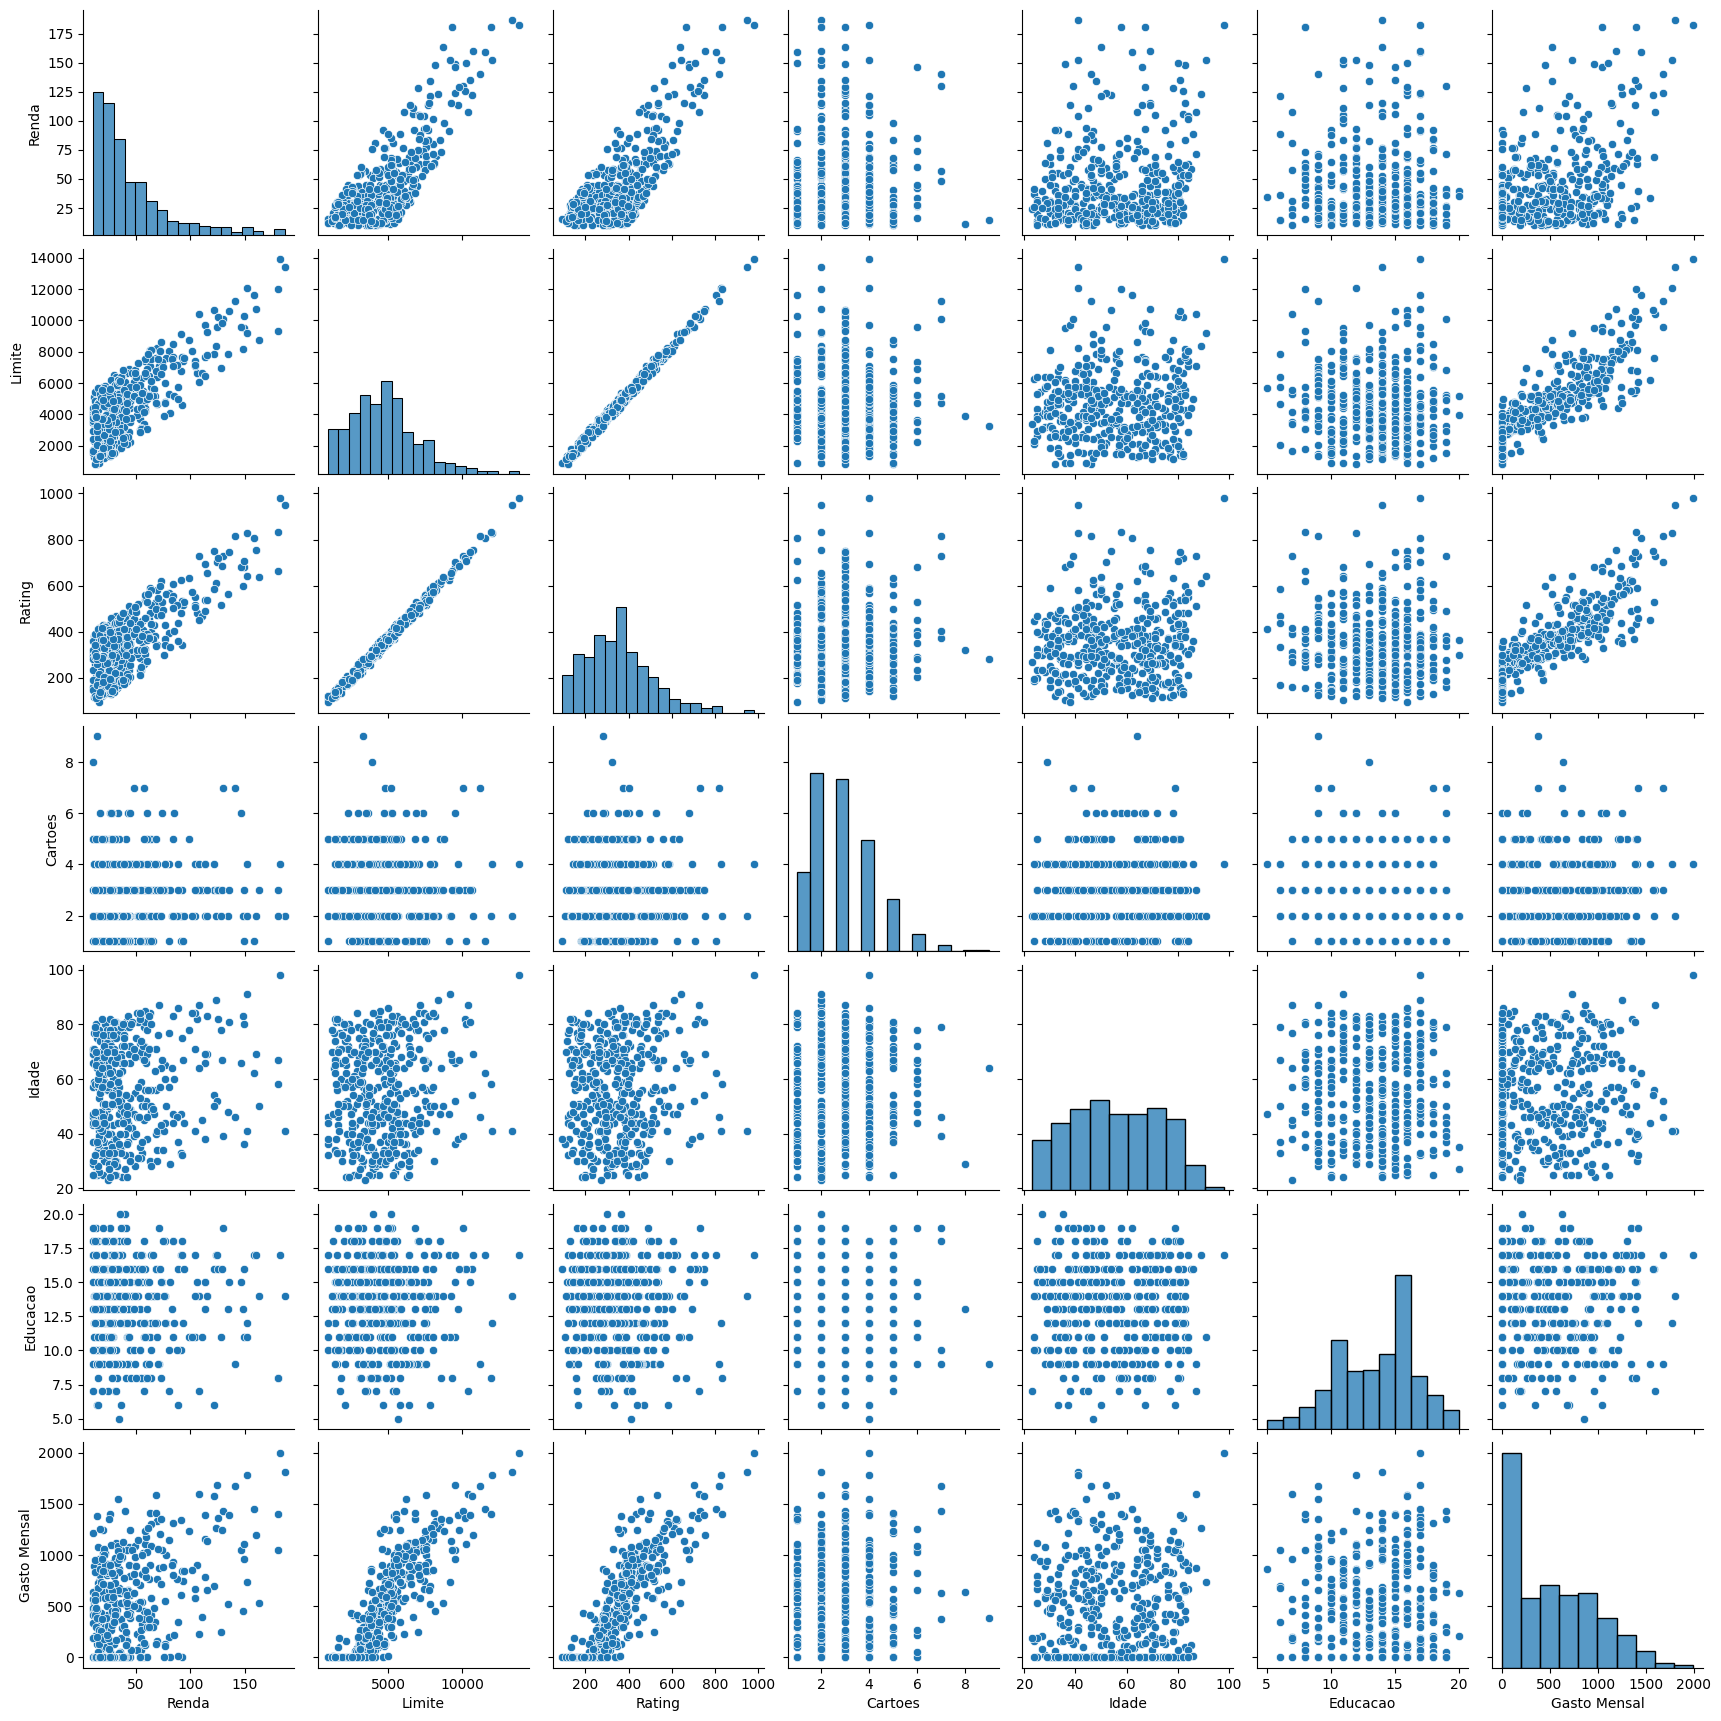

In [14]:
sns.pairplot(df)
plt.show()

In [15]:
label_encoder = LabelEncoder()

In [16]:
df['Sexo'] = label_encoder.fit_transform(df['Sexo'])
df['Estudante'] = label_encoder.fit_transform(df['Estudante'])
df['Casado'] = label_encoder.fit_transform(df['Casado'])
df['Etnia'] = label_encoder.fit_transform(df['Etnia'])

In [17]:
print(df.head())

     Renda  Limite  Rating  Cartoes  Idade  Educacao  Sexo  Estudante  Casado  \
0   14.891    3606     283        2     34        11     0          0       1   
1  106.025    6645     483        3     82        15     1          1       1   
2  104.593    7075     514        4     71        11     0          0       0   
3  148.924    9504     681        3     36        11     1          0       0   
4   55.882    4897     357        2     68        16     0          0       1   

   Etnia  Gasto Mensal  
0      2           333  
1      1           903  
2      1           580  
3      1           964  
4      2           331  


In [18]:
x = df.drop(columns=['Gasto Mensal'])
y = df['Gasto Mensal']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [23]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(x_test)

In [34]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro Médio Absoluto: {mae}')
print(f'Erro Quadrático Médio: {mse}')
print(f'R^2 Pontuação: {r2}')

Erro Médio Absoluto: 74.57755186933286
Erro Quadrático Médio: 8047.714202415232
R^2 Pontuação: 0.9518313232460386


In [28]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [29]:
y_tree_pred = tree_model.predict(x_test)

In [31]:
tree_mae = mean_absolute_error(y_test, y_tree_pred)
tree_mse = mean_squared_error(y_test, y_tree_pred)
tree_r2 = r2_score(y_test, y_tree_pred)

In [35]:
print(f'Árvore de Decisão - Erro Médio absoluto: {tree_mae}')
print(f'Árvore de Decisão  - Erro Médio absoluto: {tree_mse}')
print(f'Árvore de Decisão - R^2 Pontuação: {tree_r2}')

Árvore de Decisão - Erro Médio absoluto: 97.175
Árvore de Decisão  - Erro Médio absoluto: 20449.125
Árvore de Decisão - R^2 Pontuação: 0.8776040913914739


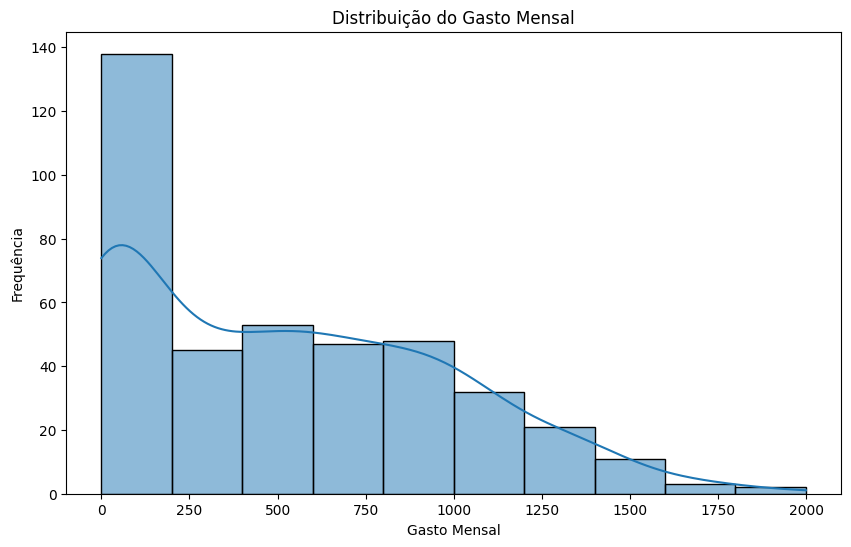

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Gasto Mensal'], kde=True)
plt.title('Distribuição do Gasto Mensal')
plt.xlabel('Gasto Mensal')
plt.ylabel('Frequência')
plt.show()

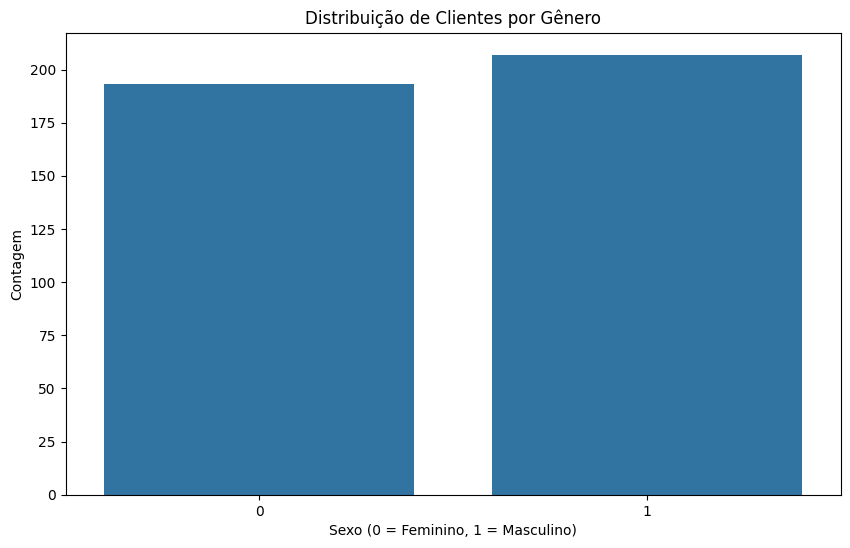

In [40]:
#Clientes por Gênero

plt.figure(figsize=(10, 6))
sns.countplot(x='Sexo', data=df)
plt.title('Distribuição de Clientes por Gênero')
plt.xlabel('Sexo (0 = Feminino, 1 = Masculino)')
plt.ylabel('Contagem')
plt.show()

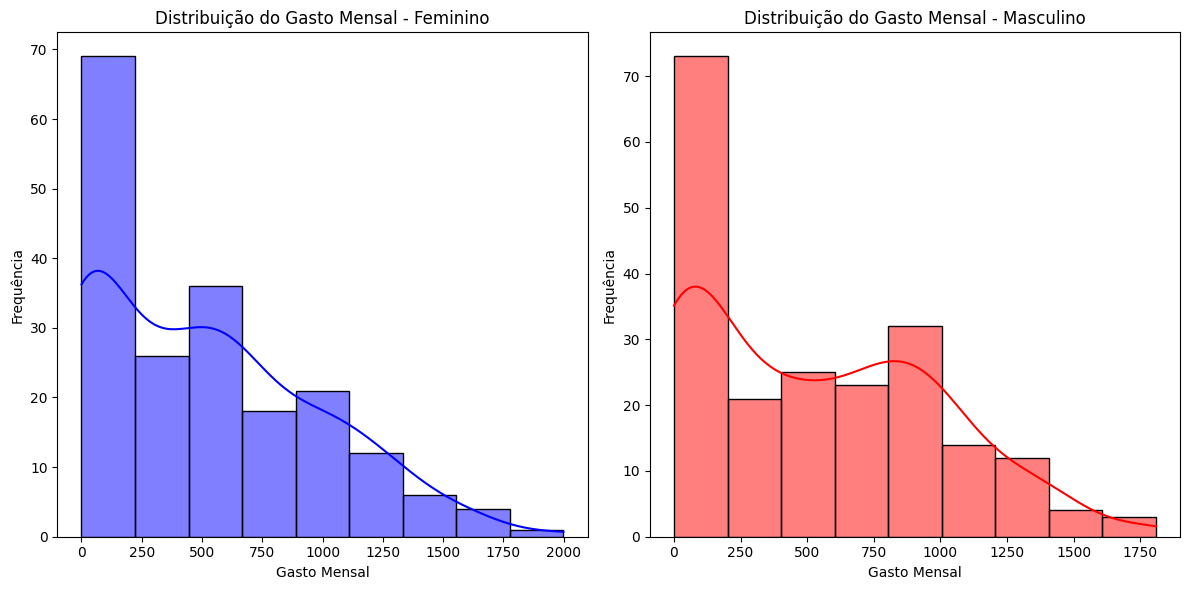

In [45]:
#Gasto Mensal por Gênero
plt.figure(figsize=(12, 6))

# Histograma para Sexo Feminino
plt.subplot(1, 2, 1)
sns.histplot(df[df['Sexo'] == 0]['Gasto Mensal'], kde=True, color='blue')
plt.title('Distribuição do Gasto Mensal - Feminino')
plt.xlabel('Gasto Mensal')
plt.ylabel('Frequência')

# Histograma para Sexo Masculino
plt.subplot(1, 2, 2)
sns.histplot(df[df['Sexo'] == 1]['Gasto Mensal'], kde=True, color='red')
plt.title('Distribuição do Gasto Mensal - Masculino')
plt.xlabel('Gasto Mensal')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

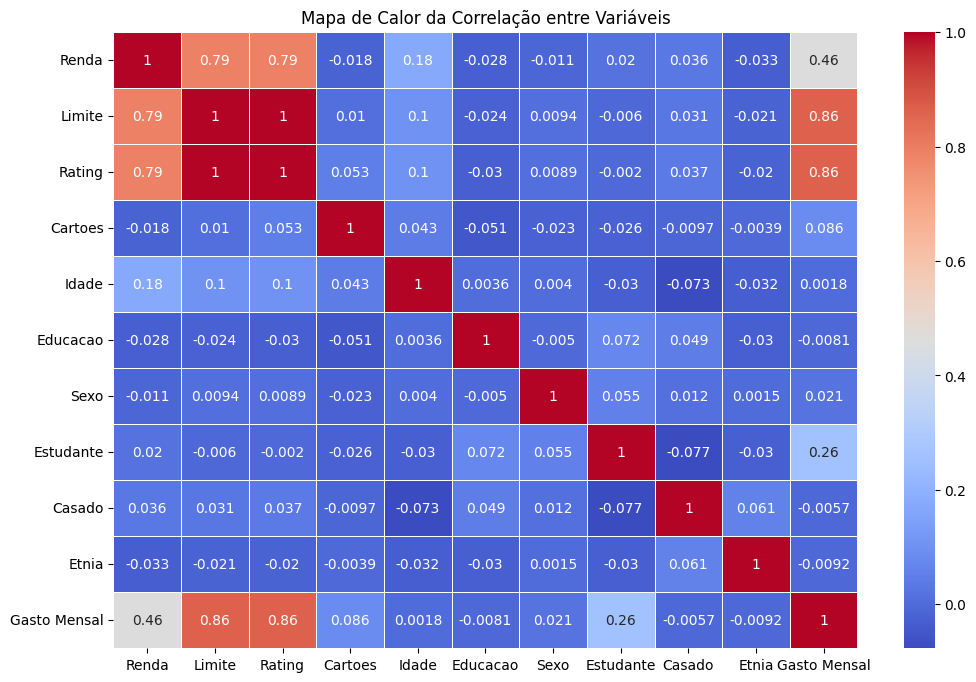

In [44]:
#Correlação entre Variáveis
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor da Correlação entre Variáveis')
plt.show()

<ipython-input-46-22fcaf93b619>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sexo', y='Gasto Mensal', data=gasto_medio_genero, palette='viridis')


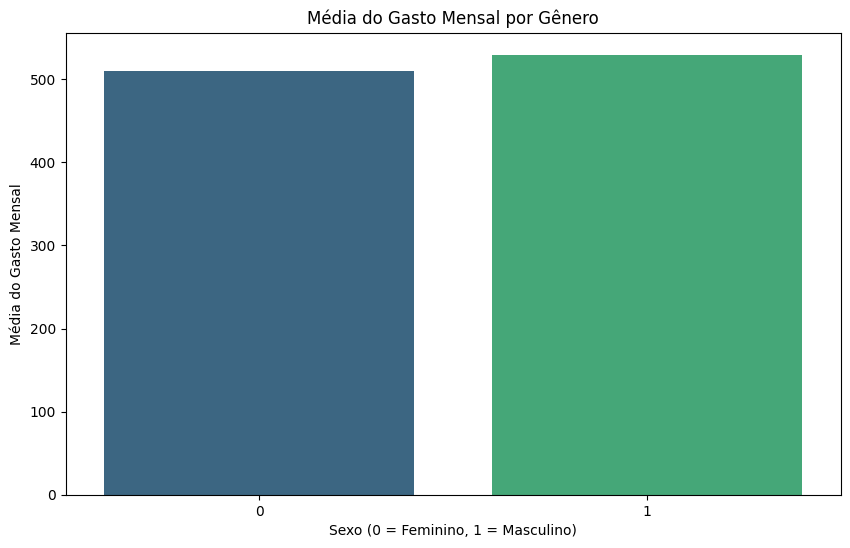

In [46]:
# Calculo da média do gasto mensal por gênero
gasto_medio_genero = df.groupby('Sexo')['Gasto Mensal'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Sexo', y='Gasto Mensal', data=gasto_medio_genero, palette='viridis')
plt.title('Média do Gasto Mensal por Gênero')
plt.xlabel('Sexo (0 = Feminino, 1 = Masculino)')
plt.ylabel('Média do Gasto Mensal')
plt.show()